# Threaded Merge Sort

1. Ontwerp op papier (a.h.v. een voorbeeld van een array van, zeg, 8 getallen) hoe je door middel van 1, 2, 4, 8 cores/processen/threads/... via het merge sort algoritme een lijst kan sorteren. Denk hierbij goed na over hoe je de data distribueert over de verschillende processen, en hoe je de resultaten ook weer efficient samen brengt. Maak gebruik van threadpools.

Hieronder staan er 4 verschillende ontwerpen van hoe het algoritme de lijst gaat soreteren bij verschillende aantaal processen.
__T__ staat voor een thread/process en __n__ voor het aantaal elementen in de lijst

__1 threads voor 8 getallen__

Hier wordt de lijst niet opgesplist en wordt meteen gesorteerd. 

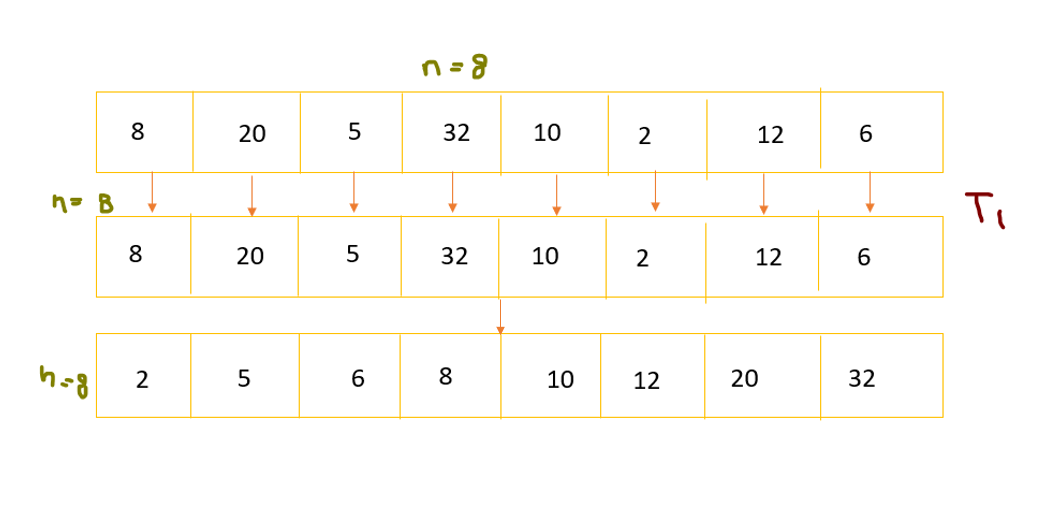

__2 threads voor 8 getallen__

Hier wordt de lijst in twee sublijsten opgesplist en beide lijsten teglijkertijd apart gesorteerd.
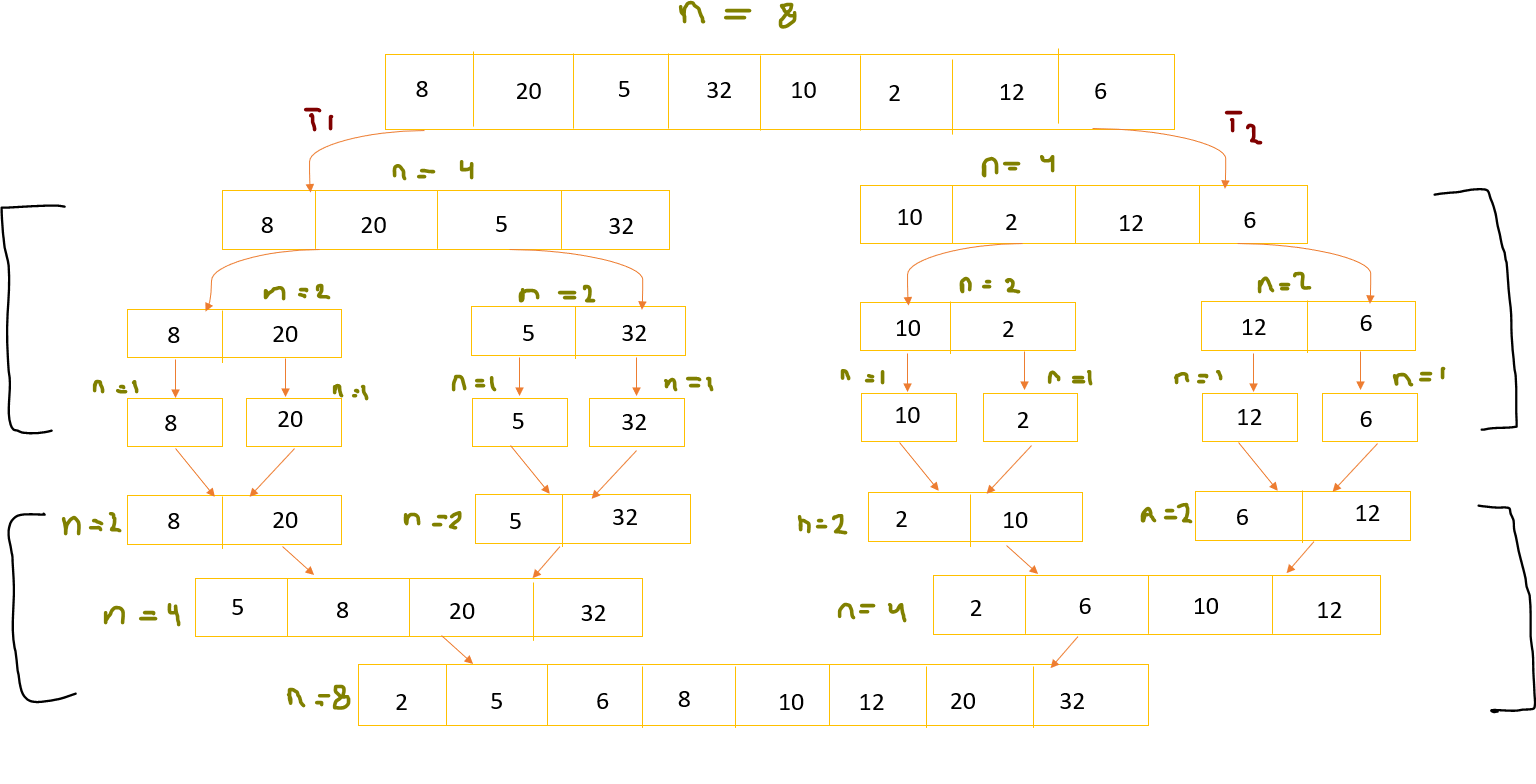

__4 threads voor 8 getallen__

Hier wordt de lijst in 4 sublijsten opgesplist, die worden tegelijkertijd apart gesorteerd.
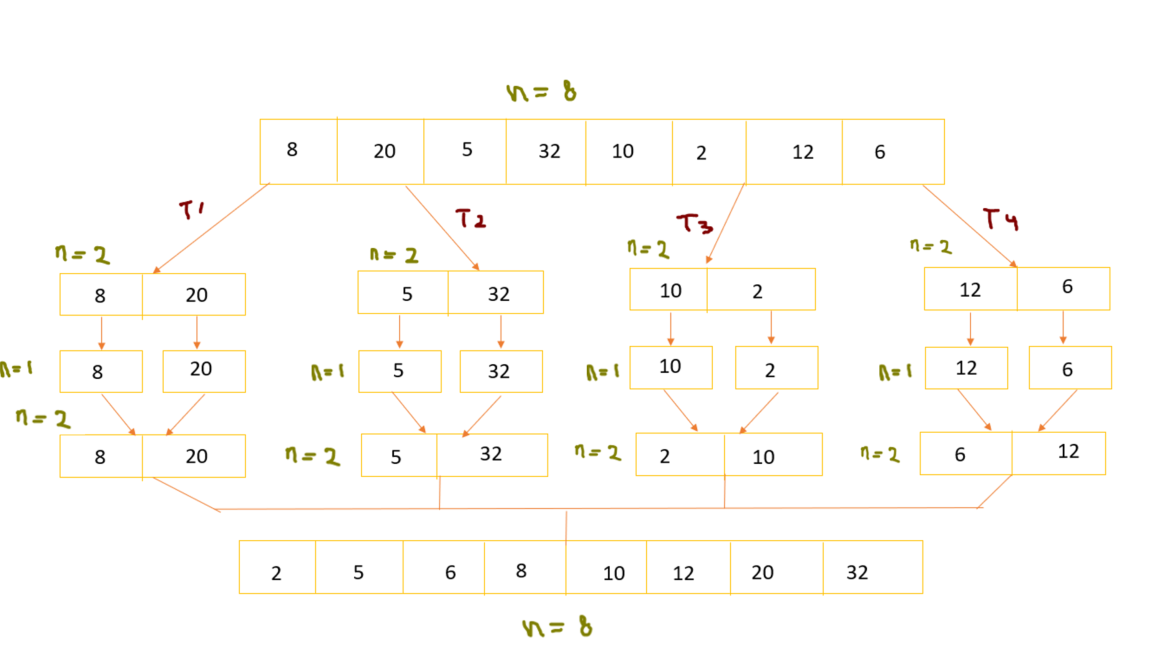

__8 threads voor 8 getallen__

Hier wordt de lijst in 8 sublijsten opgesplitsed en tegelijkertijd apart gesorteerd. 
Het sorteren van deze specfieke sublijsten heeft geen zin, aangezien elke sublijst 1 element bevat.
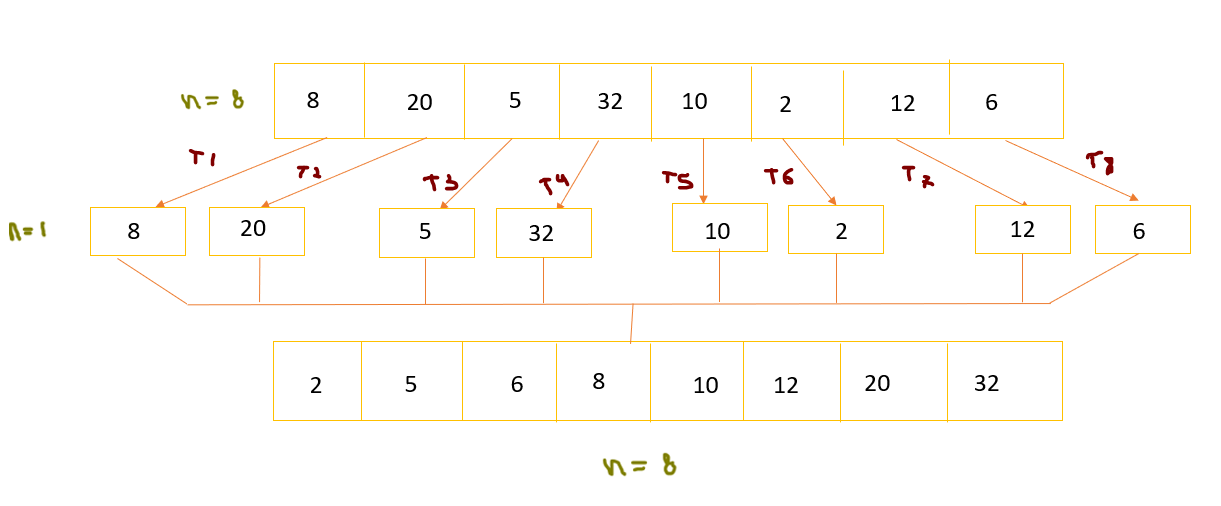

2. Analyseer je ontwerp, en bepaal wat de complexiteit van deze implementatie van merge sort is. Is deze vergelijkbaar met die we vorige keer hebben bepaald? Zo nee, waar ligt dat aan? Doe dit hoogover, dus niet regel voor regel, maar kijk meer naar hoeveel sneller/trager je algoritme wordt door te multithreaden

        De werking van het merge sort blijft ongeveer hetzelfde. Het einge verschil is dat
        het splitsen van de lijst nu via de processen gaat. Dat maakt het werking van het algoritme iets efficienter. 

        Een normale merge sort heeft een tijdscomplexiteit van $o(n log n)$. Het neemt eingelijk stappen 
        log n omdat  elke merge stap de lijst-grootte verdubbelt. 


        Echter is het bij deze versie van merge sort niet het geval. Deze algoritme werkt als volgt 
        De lijst wordt in p aantaal sublijsten opgeslplist. p staat hier voor het aantaal processen. 
        Vervolgens wordt een "normale" merge sort gerunt met een verschil dat elke n door p wordt gedeeldt. 
        En als laatste wordt elke element van de lijst met de andere elementen vergeleken,
        dit voegt een n**2 toe aan de complixiteit.

   Oftewel
               \begin{equation*} O(\frac{n}{k}  log  \frac{n}{k} +k +n^{2}) \end{equation*}


__Conclusie:__
    Ik denk dat de run time van het algoritme niet erg versneld maar juist slechter geworden is. Dat kan komen door de gelobal interpreterd lock in python die alsong alles 1 voor 1 uitvoert. Waardoor je met meer processen een langer runtime krijgt.

3. Bepaal de communicatie overhead van je ontwerp: als je aanneemt dat elke opsplitsing van de lijst, elke verplaatsing van data naar een ander process en elke samenvoeging van lijsten even lang duren (allemaal een bepaalde tijd eenheid), hoe verhoudt de hoeveelheid communicatie zich dan tot het aantal ingezette processoren en tot de grootte van de lijst?

            Het gebruiken van meerdere threads/processen zorgt voor iets betere resultaten,
            de runtime wordt iets kleiner bij een bepaalde aantaal processen.We zien overgins 
            geen echte verband tussen het aantaal communicatie stappen en de grote van de lijst.
            Echter zijn de commencatie stappen aanwezig. Je kan het zo zien:
            
            Bij elke thread horen er 2 communicatie stappen een bij het begin van de thread en de 
            andere is bij het einde. 
            
           

4. Maak een PoC implementatie in Python door middel van de threading of multiprocessing module. Bepaal testmatig wat de run-time complexiteit van je implementatie is bij gebruik van 1, 2, 4, ... threads/processen. Plot deze in een grafiek.

    Zie https://github.com/MariaDukmak/High_Performance_Programming/blob/master/Week2/Inlever_opdracht/merge_sort.py voor de implementatie

__Run time grafiek:__

    Zoals we in het grafiek hieronder zien, blijkt dat hoe meer processen we gebruiken hoe langer het duurt voordat een 
    lijst gesorteerd is. Dat betekent dat het sorteren van een lijst van 8 element met 8 processen het langst heeft geduurt.
    
    De reden waarom dit het geval is weet ik niet zeker, maar het kan door meerdere oorzaken komen zoals:
        - Het aanmaken van de processen en het joinen/mappen daarvan kost tijd.
        - Het opsplitsen van de lijst in sublijsten kost ook tijd.
        - Of dat het mergen van de gesorteerde sublijsten tijd kost aangezien die op de andere processen moet wachten.
        


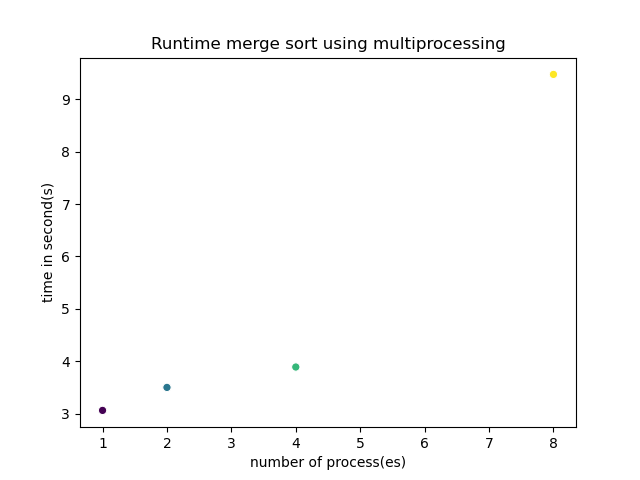

Hieronder zien we een grafiek waar de runtimre voor de merge sort bij ghouden is door gebruik te maken van multithreading 
zie https://github.com/MariaDukmak/High_Performance_Programming/blob/master/Week2/Inlever_opdracht/threaded_merge%20_sort.py voor de implimintatie. 


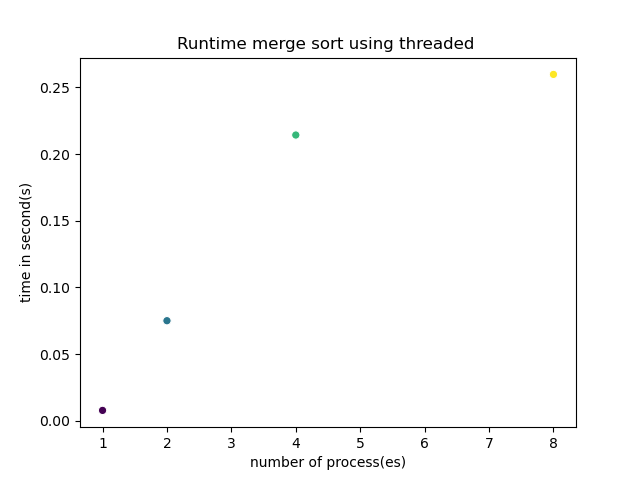

Het is duidelijk te merken dat de 8 threads nog steeds het slechts precenteert. Ook zien we een duidelijk verschil tussen de 4 processen en de thread best groot is. In het algemeen gaat het multiprocessen iets sneller en soepeler. 

__Extra__

Leg uit wat de Global Interpreter Lock is en wat dit voor invloed heeft op de uitvoering van je code

    In python is de uiitvoer van een code wanneer het compiled is als bytcode terugegeven is. Dat wil zeggen wanneer de interpreter is een bytecode aan het runnen is wordt dat gedaan door gebruik van de Global Interpreter Lock. 
    Dat betekent dat het eingelijk niet mogelijk is om twee threads tegelijkertijd te runnen oftwel dat het runnen van multiyhreading niet in Python geïmplementeerd kan worden.

    Echter is het gebruik maken van multi-processing een oplossing hiervoor. Aangezien elke Python process krijgt zijn eigen interpreter and memory space. In die zin heeft de GLI weinig invloed op de uitvoering van mijn code. 

    Bron:
    https://realpython.com/python-gil/



Maak een ontwerp op papier voor een implementatie die gebruik maakt van worker threads (waarbij nieuwe threads worden aangeroepen vanuit binnen het algoritme)

###### Voeg uitleg toe
hier worden er eerst twee threads aangemaakt vervolgens kan er een nieuwe/extra thread aangemaakt worden wanneer er meerdere peocessen uitgevoerd moeten worden in 1 thread. 
Op deze manier kan er voor gezorgd worden dat de threads sneller en efficienter kunnen werken. 

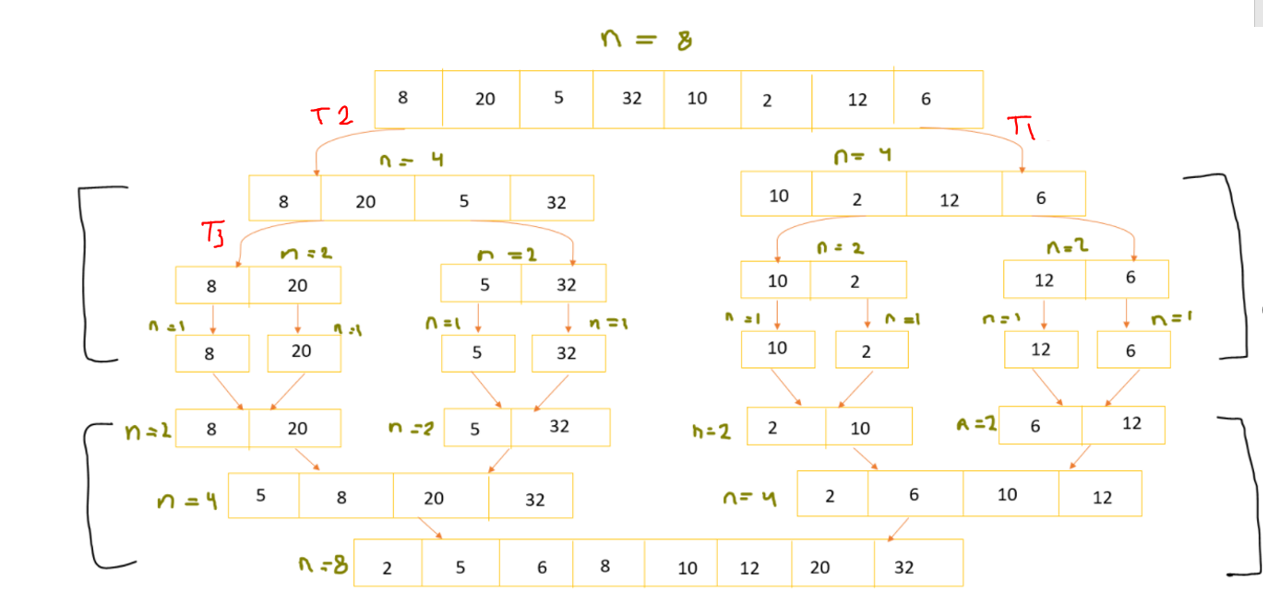